In [65]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def data_reader(file_name='white_dwarf_data.csv'):
    ### Reads the file and returns columns as sorted arrays ###
    star_masses = []
    star_surface_g = []
    line_count = 0
    with open(file_name) as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        for row in reader:
            if line_count == 0:
                line_count +=1
            else:
                star_surface_g.append(float(row[1]))
                star_masses.append(float(row[2]))
                line_count += 1
                
    star_masses = np.array(star_masses)
    star_surface_g = np.array(star_surface_g)
    

    return star_masses,star_surface_g

def scaler(M,logg):
    #### takes mass in solar mass and log of g, return scaled mass and radius ####
    #### in solar mass and earth radii                                        ####
    #constants#
    solar_mass = 1.988e30 #kg
    G = 6.67408e-11
    earth_radius = 6.371e6 #m

    g = (10**logg)*(10**(-2)) # in SI units
    mass = M * solar_mass # mass in kg
    R = np.sqrt(G*mass/g) #m
    R = R/earth_radius
    return M,R

def low_mass_radius(M,R,max_mass):
    #### takes arrays M and R returns the mass array M_new with smaller than max_mass ####
    #### and corresponding radiues as R_new arrays                                    ####
    M_new = []
    R_new = []
    for i in range(len(M)):
        if (M[i] <= max_mass):
            M_new.append(M[i])
            R_new.append(R[i])
    R_new = np.array(R_new)
    M_new = np.array(M_new)
    return M_new,R_new
        


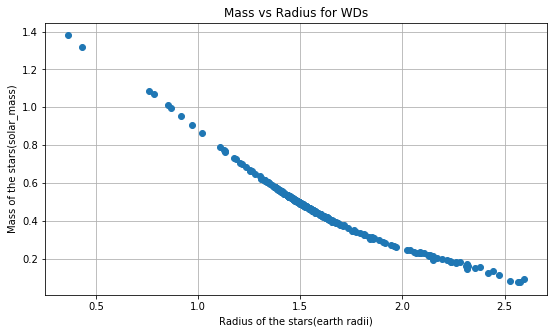

In [66]:
M,logg = data_reader()
fig, axis = plt.subplots(figsize = (9,5))
M,R = scaler(M,logg)
plt.ylabel("Mass of the stars(solar_mass)")
plt.xlabel("Radius of the stars(earth radii)")
plt.title("Mass vs Radius for WDs")
plt.grid(True)
plt.plot(R,M,'o')

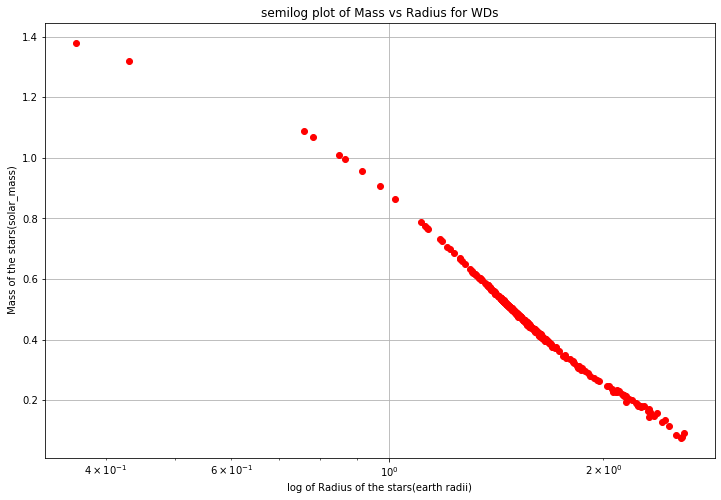

<Figure size 432x288 with 0 Axes>

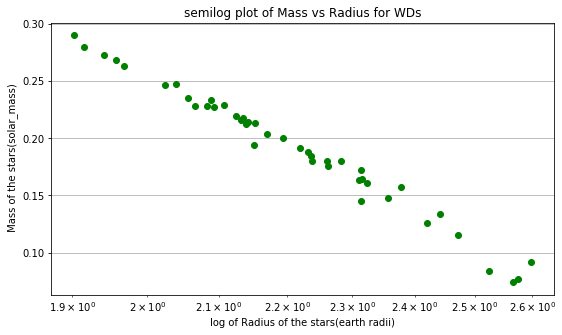

In [112]:
fig = plt.subplots(figsize = (12,8))
plt.ylabel(" Mass of the stars(solar_mass)")
plt.xlabel("log of Radius of the stars(earth radii)")
plt.title("semilog plot of Mass vs Radius for WDs")
plt.semilogx(R,M,'ro')
plt.grid(True)
## we conculude that low mass behavior is around m = 0.25
max_mass = 0.29
M_new, R_new = low_mass_radius(M,R,max_mass)
plt.figure()
fig, axis = plt.subplots(figsize = (9,5))
plt.grid(True)
plt.ylabel(" Mass of the stars(solar_mass)")
plt.xlabel("log of Radius of the stars(earth radii)")
plt.title("semilog plot of Mass vs Radius for WDs")
plt.semilogx(R_new,M_new,'go')

scaled parameters are: [ 2.66187192 -3.36637568]
nonscaled first paramter:   1.3684418608336563e+51


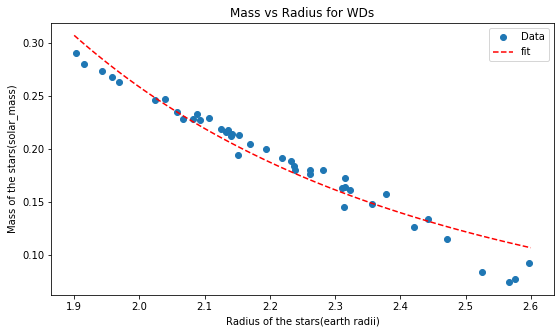

<Figure size 432x288 with 0 Axes>

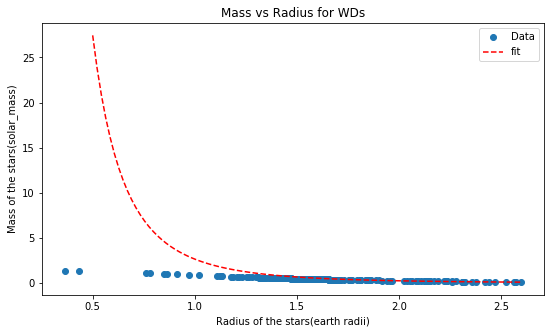

In [113]:
####FITTING########
from scipy.optimize import curve_fit
x = np.linspace(1.9,2.6,100)
def func(x,a,b):
    return a*(x**b)

solar_mass = 1.988e30 #kg
earth_radius = 6.371e6 #m
fit,cov = curve_fit(func, R_new, M_new)
fig, axis = plt.subplots(figsize = (9,5))
plt.ylabel("Mass of the stars(solar_mass)")
plt.xlabel("Radius of the stars(earth radii)")
plt.title("Mass vs Radius for WDs")
plt.plot(R_new,M_new,'o',x,func(x, *fit), '--r')
plt.gca().legend(('Data','fit'), loc='upper right')

plt.figure()
fig, axis = plt.subplots(figsize = (9,5))
z = np.linspace(0.5,2.6,100)
plt.ylabel("Mass of the stars(solar_mass)")
plt.xlabel("Radius of the stars(earth radii)")
plt.title("Mass vs Radius for WDs")
plt.plot(R,M,'o',z,func(z, *fit), '--r')
plt.gca().legend(('Data','fit'), loc='upper right')
print("scaled parameters are:",fit)
B = fit[0]*earth_radius**3*(solar_mass)
print("nonscaled first paramter:  ", fit[0]*earth_radius**3*(solar_mass))

In [114]:
#### Finding K

xi_n = 3.653680580580581
theta_prime_n = -0.20308599225966426
n=1.5
G = 6.67408e-11
K = ((B/(4*np.pi*(xi_n**5)*(-theta_prime_n)))**(1/3))*(4*np.pi*G/2.5)
#K = (B/(4*np.pi*xi_n**5*(-theta_prime_n)))**(1/3)*(4/2.5)*np.pi*G
print("K is :",K)

K is : 3144530.473379261


Text(0, 0.5, 'center density')

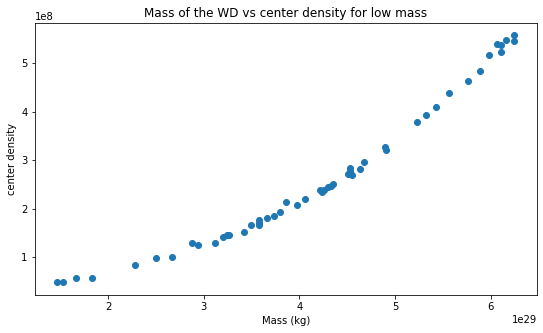

In [40]:
### Finding rho_c

solar_mass = 1.988e30 #kg
earth_radius = 6.371e6 #m

#converting to SI
M_new = M_new * solar_mass
R_new = R_new * earth_radius

rho_c = (M_new/(R_new**3))*(xi_n/(-theta_prime_n*4*np.pi))
fig, axis = plt.subplots(figsize = (9,5))
plt.plot(M_new,rho_c,'o')
plt.title("Mass of the WD vs center density for low mass")
plt.xlabel("Mass (kg)")
plt.ylabel("center density")